#Emotion Detection In Text
Text Classifier


In [22]:
# Load EDA Pkgs
import pandas as pd
import numpy as np
import seaborn as sns

In [79]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from nltk.stem import PorterStemmer
import neattext.functions as nfx
import joblib

In [80]:
# Load Dataset
df = pd.read_csv("/content/emotion_dataset_raw (1).csv")

In [81]:
df.head()

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [57]:
# Value Counts
df['Emotion'].value_counts()

,count
Emotion,
joy,11045
sadness,6722
fear,5410
anger,4297
surprise,4062
neutral,2254
disgust,856
shame,146


<Axes: xlabel='Emotion', ylabel='count'>

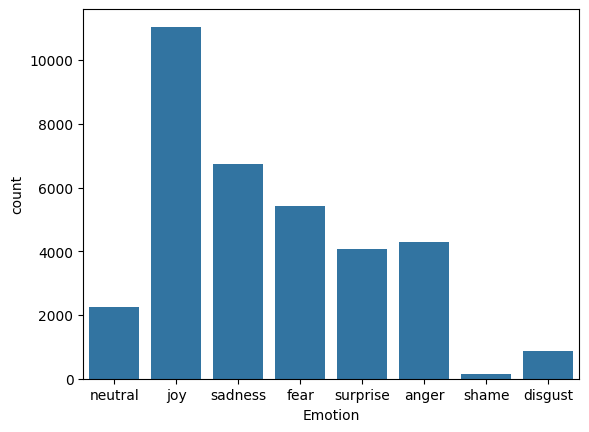

In [82]:
sns.countplot(x='Emotion',data=df)

#Data pre-processing

In [83]:
!pip install neattext
import neattext.functions as nfx

# Remove the user handles
df['Clean_Text'] = df['Text'].apply(nfx.remove_userhandles)

In [84]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [85]:
ps = PorterStemmer()

In [86]:
# Stopwords
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_stopwords)

In [87]:
df

,Emotion,Text,Clean_Text
0,neutral,Why ?,?
1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL!!! MAN HATE FUNERALS...
3,joy,Such an eye ! The true hazel eye-and so brill...,eye ! true hazel eye-and brilliant ! Regular f...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe.. hugggzzz u .! babe naamazed nga ako...
...,...,...,...
34787,surprise,@MichelGW have you gift! Hope you like it! It'...,gift! Hope like it! hand wear ! It'll warm! Lol
34788,joy,The world didnt give it to me..so the world MO...,world didnt me..so world DEFINITELY cnt away!!!
34789,anger,A man robbed me today .,man robbed today .
34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO...","Youu JEALOUSY, #Losing YOU..."


In [66]:
import neattext.functions as nfx
df['Clean_Text'] = df['Text'].apply(nfx.remove_userhandles).apply(nfx.remove_stopwords)


#Splitting data into input variables and target variable
x: Features are the attributes and variables extracted from the dataset. These extracted features are used as inputs to the model during training.

y: Labels are the output or the target variable.

In [88]:
# Features & Labels
Xfeatures = df['Clean_Text']
ylabels = df['Emotion']

#Splitting data into train and test set
We need to split our dataset into a train set and test set. The model will learn from the train set. We will use the test set to evaluate the model performance and measure the model’s knowledge capability.

In [89]:
# ipython-input-35-2a2b80e2db7c
import neattext.functions as nfx
# Assuming 'df' is a pandas DataFrame and is already defined.
# Ensure this cell is executed before the next one
df['Clean_Text'] = df['Text'].apply(nfx.remove_userhandles).apply(nfx.remove_stopwords)

# ipython-input-0-2a2b80e2db7c
# Features & Labels
# Ensure this cell is executed before the next one
Xfeatures = df['Clean_Text']
ylabels = df['Emotion']

# ipython-input-39-2a2b80e2db7c
from sklearn.model_selection import train_test_split

# Use Xfeatures and ylabels instead of x and y
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size=0.3,random_state=42)

#Training the model

In [90]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
import joblib

In [91]:
pipe_sgd = Pipeline([
    ('tfidf', TfidfVectorizer()),   # Convert text to TF-IDF features
    ('sgd', SGDClassifier(max_iter=1000, tol=1e-3))  # Stochastic Gradient Descent classifier
])


In [92]:
param_grid = {
    'sgd__loss': ['hinge', 'log'],  # Hinge loss for SVM, log for Logistic Regression
    'sgd__penalty': ['l2', 'l1', 'elasticnet'],  # Regularization types
    'sgd__alpha': [0.0001, 0.001, 0.01],  # Regularization strength
    'sgd__learning_rate': ['optimal', 'adaptive'],  # Learning rate strategies
}

In [93]:
param_grid = {
    'sgd__loss': ['hinge', 'log'],  # Hinge loss for SVM, log for Logistic Regression
    'sgd__penalty': ['l2', 'elasticnet'],  # Regularization techniques
    'sgd__alpha': [0.0001, 0.001, 0.01],  # Regularization strength
    'sgd__learning_rate': ['optimal', 'adaptive'],  # Learning rate strategies
    'tfidf__max_features': [5000, 10000],  # Limit the number of features to reduce overfitting
}

In [94]:

# Using GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(pipe_sgd, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [95]:
# Fitting the model
grid_search.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
180 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 473, in fit
    self._final_estimator.fit(Xt, y, **last_step_params["fit"])
  File "/usr/local/lib/py

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('sgd', SGDClassifier())]),
             n_jobs=-1,
             param_grid={'sgd__alpha': [0.0001, 0.001, 0.01],
                         'sgd__learning_rate': ['optimal', 'adaptive'],
                         'sgd__loss': ['hinge', 'log'],
                         'sgd__penalty': ['l2', 'elasticnet'],
                         'tfidf__max_features': [5000, 10000]},
             scoring='accuracy')

In [96]:
# Output the best parameters and accuracy
print("Best Parameters:", grid_search.best_params_)
test_accuracy = grid_search.score(x_test, y_test)
print("Test Set Accuracy:", test_accuracy)


Best Parameters: {'sgd__alpha': 0.0001, 'sgd__learning_rate': 'optimal', 'sgd__loss': 'hinge', 'sgd__penalty': 'l2', 'tfidf__max_features': 10000}
Test Set Accuracy: 0.6172638436482085


In [97]:
# Saving the model
pipeline_file = open("text_emotion_sgd_tuned.pkl", "wb")
joblib.dump(grid_search.best_estimator_, pipeline_file)
pipeline_file.close()

In [98]:
print("Model saved as text_emotion_sgd_tuned.pkl")

Model saved as text_emotion_sgd_tuned.pkl
